#**Análise de Churn** em empresa de Telecom

###Dicionário de dados

- **churn_data.csv:**
    * customerID: O ID único de cada cliente
    * tenure: O tempo durante o qual um cliente está usando o serviço
    * PhoneService: Se um cliente tem um serviço de telefone fixo junto com o serviço de Internet
    * Contract: O tipo de contrato que um cliente escolheu
    * PaperlessBilling: Se um cliente optou por faturamento sem papel
    * PaymentMethod: Especifica o método pelo qual as contas são pagas
    * MonthlyCharges: Especifica o dinheiro pago por um cliente a cada mês
    * TotalCharges: O dinheiro total pago pelo cliente à empresa
    * Churn: Esta é a variável de destino que especifica se um cliente abandonou ou não

- **customer_data.csv:**
    * customerID: O ID único de cada cliente
    * gender: O gênero de uma pessoa
    * SeniorCitizen: Se um cliente pode ser classificado como idoso
    * Partner: Se um cliente for casado / em uma união de fato
    * Dependents: Se um cliente tem dependentes (filhos / pais aposentados)

- **internet_data.csv:**
    * customerID: O ID único de cada cliente
    * MultipleLines: Se um cliente tem várias linhas de conectividade com a Internet
    * InternetService: O tipo de serviço de Internet escolhido pelo cliente
    * OnlineSecurity: Especifica se um cliente tem segurança online
    * OnlineBackup: Especifica se um cliente tem backup online
    * DeviceProtection: Especifica se um cliente optou pela proteção do dispositivo
    * TechSupport: Se um cliente optou por suporte técnico ou não
    * StreamingTV: Se um cliente tem a opção de streaming de TV
    * StreamingMovies: Se um cliente tem a opção de streaming de filmes

##**Hipótese**

No mundo acelerado e tecnológico que estamos vivendo, a depêndencia da internet se tornou algo relativamente comum. Por isso quando uma pessoa contrata um plano, a prioridade dela é sempre os benefícios de internet. Como os serviços de Telecom já entenderam essa situação, oferecem SMS e ligações gratuitas e focam em oferecer o melhor plano de conectividade como limite de gigas, largura de banda e megas de velocidade.

No entanto quando se contrata um serviço em que o suporte técnico é chamado diversas vezes, a experiência do cliente torna-se frustante, pois a última coisa que ele quer é se preocupar com o funcionamento do seu plano. Fora que a fama dos suportes técnicos não é a das melhores.

Através desse conjunto de dados, iremos saber se o cliente opta por cancelar o contrato quando percebe que necessita do suporte técnico em vez de uma experiência limpa e fluída.

As features utilizadas serão:
- **tenure**: O tempo durante o qual um cliente está usando o serviço (em meses)
- **InternetService**: O tipo de serviço de Internet escolhido pelo cliente
- **PaperlessBilling**: Se um cliente optou por faturamento sem papel
- **Contract**: O tipo de contrato que o cliente escolheu
- **TechSupport**: Se um cliente optou por suporte técnico ou não

#**Análise Exploratória de Dados**

In [1]:
# importando as bibliotecas necessárias para manipular e visualizar os dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importando os datasets e visualizando alguns registros e features

churn_data = pd.read_csv("/content/drive/MyDrive/churn_data.csv")
churn_data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
customer_data = pd.read_csv("/content/drive/MyDrive/customer_data.csv")
customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [4]:
internet_data = pd.read_csv("/content/drive/MyDrive/internet_data.csv")
internet_data

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


O conjunto de dados está separado em 3 diferentes arquivos. Vamos precisar usar o **método merge** para conseguir unir tudo em um único dataframe e utilizar apenas as colunas necessárias.

In [5]:
churn = pd.merge(churn_data[["customerID","tenure", "Contract", "PaperlessBilling", "Churn"]],
                 internet_data[["customerID", "InternetService", "TechSupport"]],
                 on="customerID")

churn.sample(10)

,customerID,tenure,Contract,PaperlessBilling,Churn,InternetService,TechSupport
5526,6546-OPBBH,51,One year,Yes,No,No,No internet service
2867,7244-KXYZN,24,One year,No,No,No,No internet service
1740,1222-KJNZD,40,Month-to-month,Yes,No,No,No internet service
1814,5442-PPTJY,12,Two year,No,No,No,No internet service
4029,0019-GFNTW,56,Two year,No,No,DSL,Yes
2648,6131-FOYAS,35,Month-to-month,Yes,No,DSL,No
4781,9814-AOUDH,53,Two year,No,No,No,No internet service
414,1996-DBMUS,48,Month-to-month,Yes,No,Fiber optic,No
3081,6376-GAHQE,4,Month-to-month,No,Yes,Fiber optic,No
3789,0310-VQXAM,9,Month-to-month,No,No,No,No internet service


In [6]:
# verificando as informações do dataset

churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   tenure            7043 non-null   int64 
 2   Contract          7043 non-null   object
 3   PaperlessBilling  7043 non-null   object
 4   Churn             7043 non-null   object
 5   InternetService   7043 non-null   object
 6   TechSupport       7043 non-null   object
dtypes: int64(1), object(6)
memory usage: 440.2+ KB


In [7]:
# verificando se existem arquivos faltantes

churn.isnull().sum()

customerID          0
tenure              0
Contract            0
PaperlessBilling    0
Churn               0
InternetService     0
TechSupport         0
dtype: int64

In [8]:
# verificando os valores uniques das variáveis categóricas

churn.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [9]:
churn.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
churn.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [11]:
churn.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [12]:
churn.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

# Tenure: Quando tempo o cliente ficou na empresa

Essa métrica indica quanto tempo o cliente ficou com a empresa, levando em consideração que os planos são anuais ou mensais.

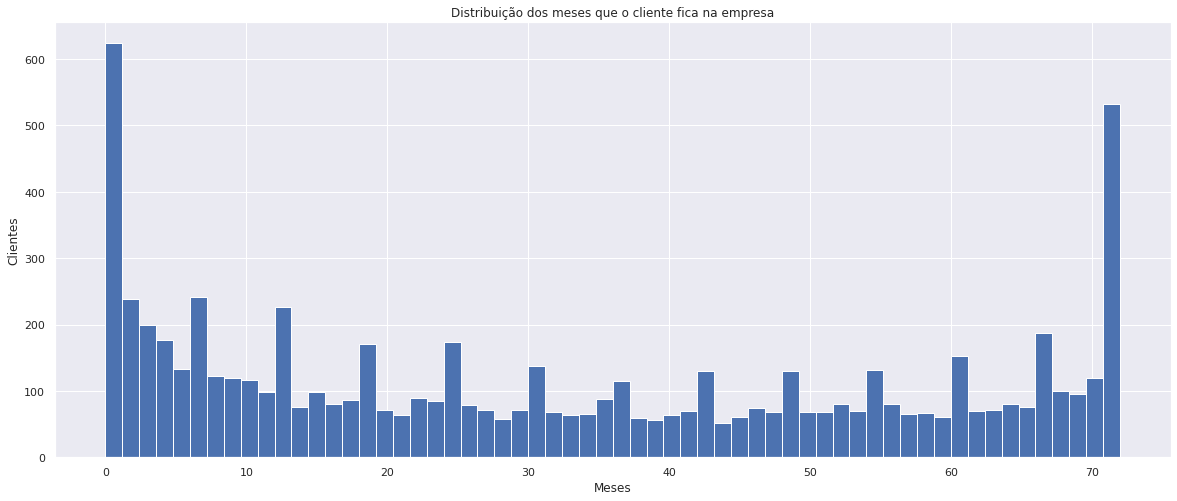

In [13]:
# plotando um gráfico para visualizar a distribuição dos meses

sns.set_theme()

churn.tenure.plot(kind="hist",
                  figsize=(20,8),
                  title="Distribuição dos meses que o cliente fica na empresa",
                  bins=60);

plt.xlabel("Meses")
plt.ylabel("Clientes");

A maioria dos clientes fica na empresa entre 1 mês e 72 meses (6 anos), tendo uma maior concentração nos primeiros meses. Podemos ver que a polaridade é altíssima. Para os clientes que ficaram mais de 70 meses, nota-se que a renovação atual foi feita 6 vezes.

#Contract - O tipo de contrato que o cliente escolheu

Já sabemos que a concentração de clientes está no 1˚ mês. Vamos checar se isso se deve à facilidade de cancelamento do contrato.

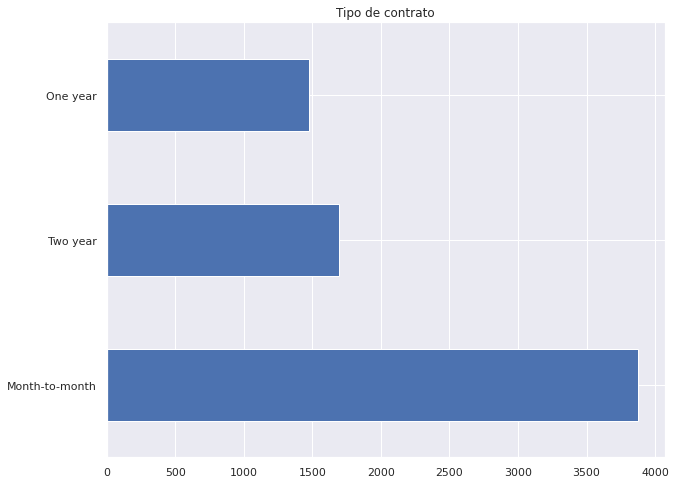

In [14]:
# plotando um gráfico para visualização das variáveis do modelo de contrato

churn.Contract.value_counts().plot(kind="barh",
                                   figsize=(10,8),
                                   title="Tipo de contrato");

Aqui está uma grande ideia do porquê os clientes ficam apenas 1 mês no serviço. Existe uma facilidade enorme para o cancelamento do plano, pois no contrato de mensalidade não há multa para cancelamentos entre um mês e outro. Nisso, há poucas oportunidades para a empresa conseguir encantar o seu cliente e oferecer uma **vantagem palpável** para ele.

Mas porque a maioria dos contratos são de mensalidade sendo que nos planos anuais o valor dividido mensalmente tende a ficar menor?

Vamos continuar nossa análise para descobrir.

# PaperlessBilling - Se o cliente optou por usar a fatura digital

A fatura digital é uma forma muito mais apropriada da empresa conseguir lidar com os pagamentos de seus clientes. Ajuda a diminuir custos, facilita a organização e diminui as inadimplências.

De 7043 registros, **4171 optaram pela fatura digital** enquanto que 2872 clientes optaram pela fatura física.

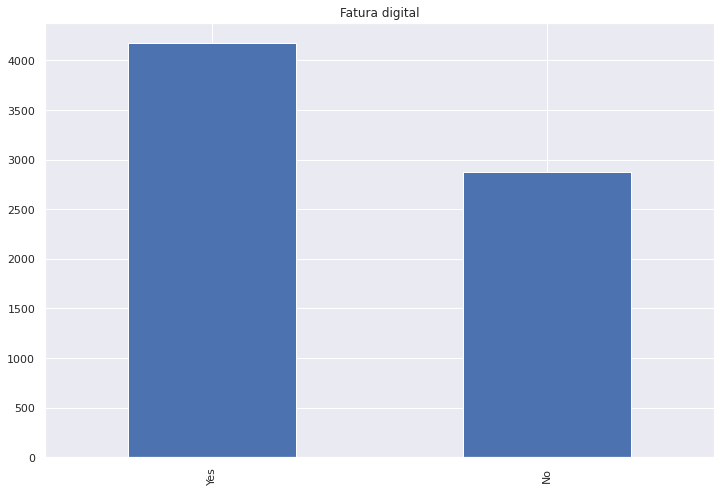

In [15]:
churn.PaperlessBilling.value_counts().plot(kind="bar",
                                           figsize=(12,8),
                                           title="Fatura digital");

A fatura digital é aceita majoritariamente pela **geração Y ou Millennials** (pessoas nascidas em 1981 até 1996).

Essa geração é marcada pelas experiências inovadoras, rápidas, não burocráticas e principalmente livres. Eles ditam as estratégias da maior parte das empresas.

Por isso a tabela abaixo mostra que os clientes que optaram pelo modelo de contrato **Mês a Mês** (ou seja, liberdade para cancelar a qualquer momento), foram responsáveis por mais da metade dos pedidos de fatura digital.

Essa faixa de clientes não gosta de estar presa à nenhum serviço e por mais que pague um valor maior pela fatura mensal, em detrimento da anual, optam por esse meio. Se por algum motivo o serviço for ruim, eles migram para outro do dia para a noite.

Fatura física? Nem pensar! Quanto menos papel, melhor.

In [16]:
pd.crosstab(churn["PaperlessBilling"], churn["Contract"])

Contract,Month-to-month,One year,Two year
PaperlessBilling,,,
No,1289,673,910
Yes,2586,800,785


#InternetService -  O tipo de serviço de internet escolhido pelo cliente

Se os clientes estão realmente preocupados com uma internet mais veloz, então faria sentido eles contratarem o tipo de conexão mais veloz. Os tipos de conexão são:
- **DSL**: Realizado através de pulso magnético e que pode facilmente sofrer interferência por eletricidade e outros fatores, causando uma queda de sinal muito grande. Em poucas palavras, seria um tipo de conexão de baixa qualidade
- **Fibra Ótica**: Tem a mesma velocidade de download e upload e é realizada através da luz, por isso quase não sofre nenhum tipo de interferência. Esse tipo de conexão é a mais veloz.

Já sabemos que 3096 clientes optaram pela fibra ótica e 2421 pela DSL. O restante optou por não ter uma linha de internet.

Vamos visualizar melhor esses números.

In [17]:
churn.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

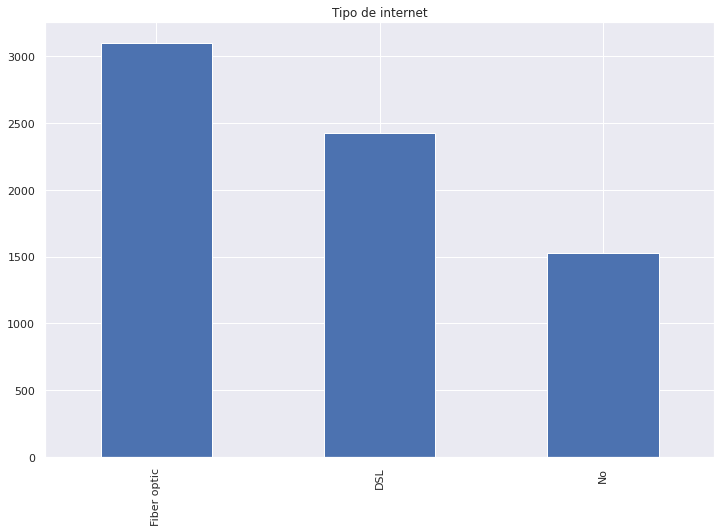

In [18]:
churn.InternetService.value_counts().plot(kind="bar",
                                          figsize=(12,8),
                                          title="Tipo de internet");

A fibra ótica é muito requisitada quando o assunto é: **assistir filmes online em streaming, ouvir músicas em streaming, jogar online, resolver questões do trabalho (principalmente no modo home office) e se entreter de diversas outras formas.**

Mais uma vez a geração Y faz protagonismo aqui. Ela é responsável pelo aumento de consumo dos conteúdos citados acima.

fonte: Global Millennial Survey 2020, Deloitte

#TechSupport - Se o cliente optou pela assistência técnica

Aqui finalmente vamos conseguir identificar mais a fundo, se realmente a opção de assistência técnica é um dos fatores que **influênciam no churn dos clientes**, visto que nas análises anteriores pudemos saber com qual geração estávamos lidando e saber os seus hábitos de consumo.

In [19]:
#Vamos criar uma tabela de comparação

pd.crosstab(churn["TechSupport"], churn["Churn"])

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


In [20]:
# Ficou um pouco confuso por conta dos registros "No internet service"
# Vamos excluí-lo da nossa tabela, pois não servirá para nós

churn = churn[~churn.TechSupport.str.contains("No internet service")]

In [21]:
# Rodando o comando crosstab novamente

pd.crosstab(churn["TechSupport"], churn["Churn"])

Churn,No,Yes
TechSupport,,
No,2027,1446
Yes,1734,310


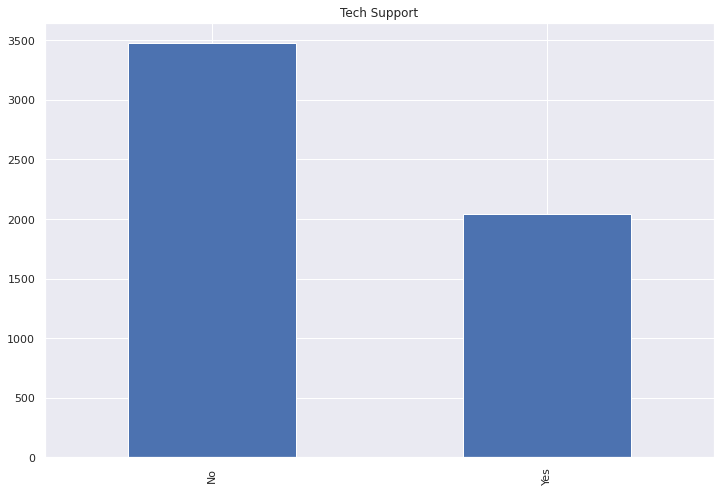

In [22]:
# A visualização está melhor assim
# Vamos criar um gráfico para visualizar a comparação

churn.TechSupport.value_counts().plot(kind="bar",
                                      figsize=(12,8),
                                      title="Tech Support");

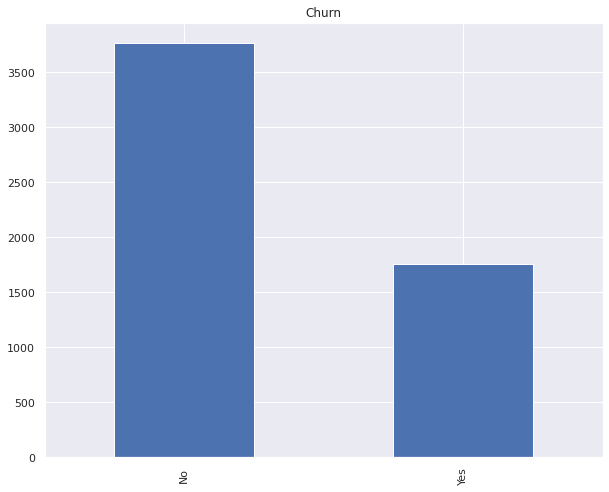

In [23]:
churn.Churn.value_counts().plot(kind="bar",
                                figsize=(10,8),
                                title="Churn");

#Conclusão

Olhando os gráficos finais podemos ver claramente que:
- Os clientes que **não pediram suporte técnico**, não entraram em churn. Muito possivelmente o serviço é intuitivo e de fácil utilização.
- O número de clientes que **pediram suporte técnico** e não entraram em churn, foi maior do que os que pediram e decidiram sair.

Em outras palavras:
Deve-se investir em **persuasão e técnicas de vendas** para que os clientes optem pelo suporte técnico, pois a porcentagem de churn quando o cliente opta por essa opção é infinitamente menor, do que quando ele não pede.

#Machine Learning - Prevendo clientes que entrarão em churn

Agora que ja sabemos que minha hipótese foi refutada e já temos um presuposto de qual caminho não seguir, vamos prototipar um pequeno modelo de Machine Learning usando a mesma base de dados para prever os clientes que entrarão em churn.

Usaremos o algoritmo **Decision Tree**, sem nos preocupar com a performance pois o objetivo aqui não é criar um modelo robusto e sim uma experimentação. 

In [24]:
# Importando as bibliotecas necessárias

import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn import preprocessing

In [25]:
# As nossas bases de dados estão carregadas mas iremos criar uma nova
# com todas as colunas

churn = pd.merge(churn_data,
                 internet_data,
                 on="customerID")

churn.sample(10)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1441,2480-EJWYP,58,Yes,One year,Yes,Bank transfer (automatic),97.80,5458.8,No,Yes,Fiber optic,No,Yes,No,No,Yes,Yes
235,1251-KRREG,2,Yes,Month-to-month,Yes,Mailed check,54.40,114.1,Yes,Yes,DSL,No,Yes,No,No,No,No
3658,3604-WLABM,10,Yes,Month-to-month,No,Electronic check,54.25,583,No,No,DSL,No,No,Yes,Yes,No,No
5531,2137-DQMEV,68,No,One year,No,Mailed check,44.80,2983.65,No,No phone service,DSL,Yes,Yes,No,No,Yes,No
120,1091-SOZGA,56,Yes,One year,Yes,Credit card (automatic),99.80,5515.45,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
3309,6061-PQHMK,25,Yes,One year,No,Credit card (automatic),19.90,527.5,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
830,9101-BWFSS,50,Yes,One year,No,Electronic check,108.55,5610.7,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes
6982,8468-FZTOE,72,Yes,Two year,Yes,Electronic check,74.35,5237.4,No,No,DSL,Yes,Yes,Yes,Yes,No,Yes
2558,5380-XPJNZ,38,Yes,One year,No,Mailed check,20.05,678.2,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
6260,0458-HEUZG,13,No,Two year,No,Mailed check,35.40,450.4,No,No phone service,DSL,No,No,Yes,Yes,No,No


In [26]:
churn = pd.merge(churn,
                 customer_data,
                 on="customerID")

churn.sample(10)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
6217,1599-MMYRQ,62,Yes,One year,Yes,Credit card (automatic),81.45,4983.05,No,No,Fiber optic,Yes,Yes,No,No,No,No,Male,0,Yes,Yes
4951,5117-IFGPS,29,Yes,Month-to-month,Yes,Electronic check,84.30,2357.75,No,Yes,Fiber optic,No,No,No,No,No,Yes,Male,1,Yes,No
5068,6892-BOGQE,71,Yes,Two year,Yes,Bank transfer (automatic),20.90,1493.2,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Female,0,Yes,No
2041,3546-GHEAE,7,Yes,Two year,No,Mailed check,19.45,165.35,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,0,No,No
5557,6918-UMQCG,5,Yes,Month-to-month,No,Electronic check,80.20,384.25,No,No,Fiber optic,No,No,No,No,Yes,No,Female,0,No,No
6794,1047-RNXZV,43,Yes,Two year,No,Mailed check,19.55,876.15,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Male,0,No,No
6741,2180-DXNEG,12,Yes,Month-to-month,Yes,Electronic check,96.00,1062.1,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Female,0,No,No
2043,6557-BZXLQ,16,Yes,Month-to-month,No,Electronic check,69.65,1043.3,No,No,Fiber optic,No,No,No,No,No,No,Male,1,No,No
2363,4373-VVHQL,1,Yes,Month-to-month,Yes,Electronic check,44.75,44.75,No,No,DSL,No,No,No,No,No,No,Male,0,No,No
4983,1862-SKORY,40,No,Month-to-month,Yes,Electronic check,39.30,1637.4,Yes,No phone service,DSL,No,Yes,No,No,Yes,No,Female,1,Yes,No


In [27]:
# Existem features no nosso dataset que estão no formato object
# Vamos precisar usar um Encoder

churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   MultipleLines     7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


In [28]:
# Aplicando o Label Encoder

le = preprocessing.LabelEncoder()
churn = churn.apply(le.fit_transform)

In [29]:
# A coluna "TotalCharges" possui valor numéricos, porém está em formato object
# Transformando em float64

churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [30]:
# A coluna "customerID" não será relevante
# Excluíndo-a

churn.drop(churn[['customerID']], axis=1, inplace=True)

In [31]:
# Verificando se os dados estão no formato correto

churn.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,1,0,0,1,2,142,2505,0,1,0,0,2,0,0,0,0,0,0,1,0
1,34,1,1,0,3,498,1466,0,0,0,2,0,2,0,0,0,1,0,0,0
2,2,1,0,1,3,436,157,1,0,0,2,2,0,0,0,0,1,0,0,0
3,45,0,1,0,0,266,1400,0,1,0,2,0,2,2,0,0,1,0,0,0
4,2,1,0,1,2,729,925,1,0,1,0,0,0,0,0,0,0,0,0,0


In [32]:
# Separando os dados da feature alvo "Churn" e separando em dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(churn.drop('Churn',axis=1), churn['Churn'],test_size=0.3)

In [33]:
X_train.shape,X_test.shape

((4930, 19), (2113, 19))

In [34]:
y_train.shape,y_test.shape

((4930,), (2113,))

In [35]:
# Instânciando o classificador

clf = DecisionTreeClassifier()

In [36]:
# Treinando os dados de treino

clf = clf.fit(X_train,y_train)

In [37]:
# Visualizando a importância das features pro modelo

for feature,importancia in zip(churn.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

tenure:0.11925683874731272
PhoneService:0.0034096481753525454
Contract:0.16516230759800596
PaperlessBilling:0.02416637322362865
PaymentMethod:0.04046086364011241
MonthlyCharges:0.20394799803081523
TotalCharges:0.1892404630981631
Churn:0.011053823688692012
MultipleLines:0.025095856528741023
InternetService:0.043679890307490206
OnlineSecurity:0.015387850600522692
OnlineBackup:0.01688784522725534
DeviceProtection:0.014773125975904777
TechSupport:0.01571932793368321
StreamingTV:0.011739450088735367
StreamingMovies:0.023110959477633565
gender:0.02085465089238206
SeniorCitizen:0.026748364985646426
Partner:0.02930436177992289


In [38]:
# Fazendo a predição nos dados de teste

resultado = clf.predict(X_test)
resultado

array([1, 0, 0, ..., 0, 0, 0])

In [39]:
# Visualizando a acurácia, precisão, recall, f1-score e support

print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1536
           1       0.51      0.52      0.52       577

    accuracy                           0.73      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.74      0.73      0.73      2113



#Off

In [ ]:
# STREAMLIT API

!pip install streamlit

!pip install pyngrok==4.1.1

In [41]:
!ngrok

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [42]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.preprocessing import LabelEncoder


@st.cache(allow_output_mutation=True)
def loadData():
    churn = pd.read_csv("/content/drive/MyDrive/df_churn")
    return churn


def preprocessing(churn):
    X = churn[['gender',
                        'SeniorCitizen',
                        'Partner',
                        'Dependents',
                        'tenure',
                        'PhoneService',
                        'Contract',
                        'PaperlessBilling',
                        'PaymentMethod',
                        'MonthlyCharges',
                        'TotalCharges',
                        'MultipleLines',
                        'InternetService',
                        'OnlineSecurity',
                        'OnlineBackup',
                        'DeviceProtection',
                        'TechSupport',
                        'StreamingTV',
                        'StreamingMovies']]
    y = churn['Churn']

    le = LabelEncoder()
    churn = churn.apply(le.fit_transform)

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
    return X_train, X_test, y_train, y_test, le


@st.cache(suppress_st_warning=True)
def decisionTree(X_train, X_test, y_train, y_test):
    tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred) * 100
    report = classification_report(y_test, y_pred)

    return score, report, tree



PAGE_CONFIG = {"page_title":"Machine Learning","page_icon":":smiley:","layout":"centered"}
st.set_page_config(**PAGE_CONFIG)

st.title("Previsão de Churn com Machine Learning")
st.subheader("Direto do Google Colab")

user_input = st.text_input("Digite o nome do cliente")


st.write("Cliente: ", user_input)

def get_user_data():
  gender = st.radio("Qual é o gênero?", ("Masculino", "Feminino"), key=1)
  SeniorCitizen = st.radio("É idoso?", ("Sim", "Não"), key=2)
  Partner = st.radio("É casado ou está em união estável?", ("Sim", "Não"), key=3)
  Dependents = st.radio("Possui dependentes? (Filhos ou pais aposentados)", ("Sim", "Não"), key=4)
  tenure = st.slider("Há quantos meses usa o serviço?", min_value= 0, max_value= 100, step= 1, key=1)
  PhoneService = st.radio("Possui serviço de telefone fixo junto com o serviço de internet?", ("Sim", "Não"), key=5)
  Contract = st.selectbox("Que tipo de contrato escolheu?", ["Mensal", "Anual", "Bianual"], key=6)
  PaperlessBilling = st.radio("A fatura é digital?", ("Sim", "Não"), key=7)
  PaymentMethod = st.selectbox("Método de pagamento", ["Cheque eletrônico", "Cheque enviado", "Débito em conta", "Cartão de crédito"], key=8)
  MonthlyCharges = st.number_input("Qual é o valor da fatura mensal? (ex: 73,85)", key=1)
  TotalCharges = st.number_input("Quanto é o valor total gasto na companhia? (ex: 1335,2)", key=2)
  MultipleLines = st.radio("Possui várias linhas de conectividade com a internet?", ("Sim", "Não", "Não possui linha"), key=9)
  InternetService = st.radio("O tipo de internet", ("Fibra ótica", "DSL", "Não possui internet"), key=10)
  OnlineSecurity = st.radio("Possui segurança online?", ("Sim", "Não", "Não possui internet"), key=11)
  OnlineBackup = st.radio("Possui backup online?", ("Sim", "Não", "Não possui internet"), key=12)
  DeviceProtection = st.radio("Possui proteção pro dispositivo?", ("Sim", "Não", "Não possui internet"), key=13)
  TechSupport = st.radio("Optou pelo suporte técnico?", ("Sim", "Não", "Não possui internet"), key=14)
  StreamingTV = st.radio("Possui serviço de streaming de televisão?", ("Sim", "Não", "Não possui internet"), key=15)
  StreamingMovies = st.radio("Possui serviço de streaming de filmes?", ("Sim", "Não", "Não possui internet"), key=16)


  user_data = np.array([gender,
                        SeniorCitizen,
                        Partner,
                        Dependents,
                        tenure,
                        PhoneService,
                        Contract,
                        PaperlessBilling,
                        PaymentMethod,
                        MonthlyCharges,
                        TotalCharges,
                        MultipleLines,
                        InternetService,
                        OnlineSecurity,
                        OnlineBackup,
                        DeviceProtection,
                        TechSupport,
                        StreamingTV,
                        StreamingMovies
                        ]).reshape(1,-1)

  features = pd.DataFrame(user_data, index = [0])

  return features


user_input_variables = get_user_data()

st.subheader("Dados do usuário")
st.write(user_input_variables)


def main():
    st.title("Predizendo se o cliente entrará em churn!")
    data = loadData()
    X_train, X_test, y_train, y_test, le = preprocessing(data)

    score, report, tree = decisionTree(X_train, X_test, y_train, y_test)
    st.text("A acurácia da Árvore de Decisão é: ")
    st.write(score,"%")
    	
    #le = LabelEncoder()   
    pred = tree.predict(user_input_variables.apply(le.fit_transform))
    st.write("A classe predita é: ", pred)

if __name__ == "__main__":
    main()

Overwriting app.py


In [43]:
!ngrok authtoken 1sfd7HX558YMVuhGqY651PMhrnd_eFi37HdygfzrUZCMUjLK

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [44]:
!streamlit run app.py &>/dev/null&

In [45]:
from pyngrok import ngrok

In [46]:
# Iniciando um tunel do Streamlit na porta 8501
public_url = ngrok.connect(port='8501')
public_url

'http://12a32992ad06.ngrok.io'